In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Exploratory data analysis 
import ydata_profiling as dp

# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

# Data modeling
from collections import Counter
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

**Different features in the dataset**

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [4]:
data = pd.read_csv('heart.csv', sep = ',')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
print(data.size)
print(data.shape)

14350
(1025, 14)


### Data set

The data set here is composed of 14350 variables in 1025 rows and 14 columns : it's a rather decent sized data set

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Only 1 column among the 14 columns of the dataset is a float type, the other are int types.**

**There's no null values in the dataset so we can keep every information in the dataset**

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Correlation between each features

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


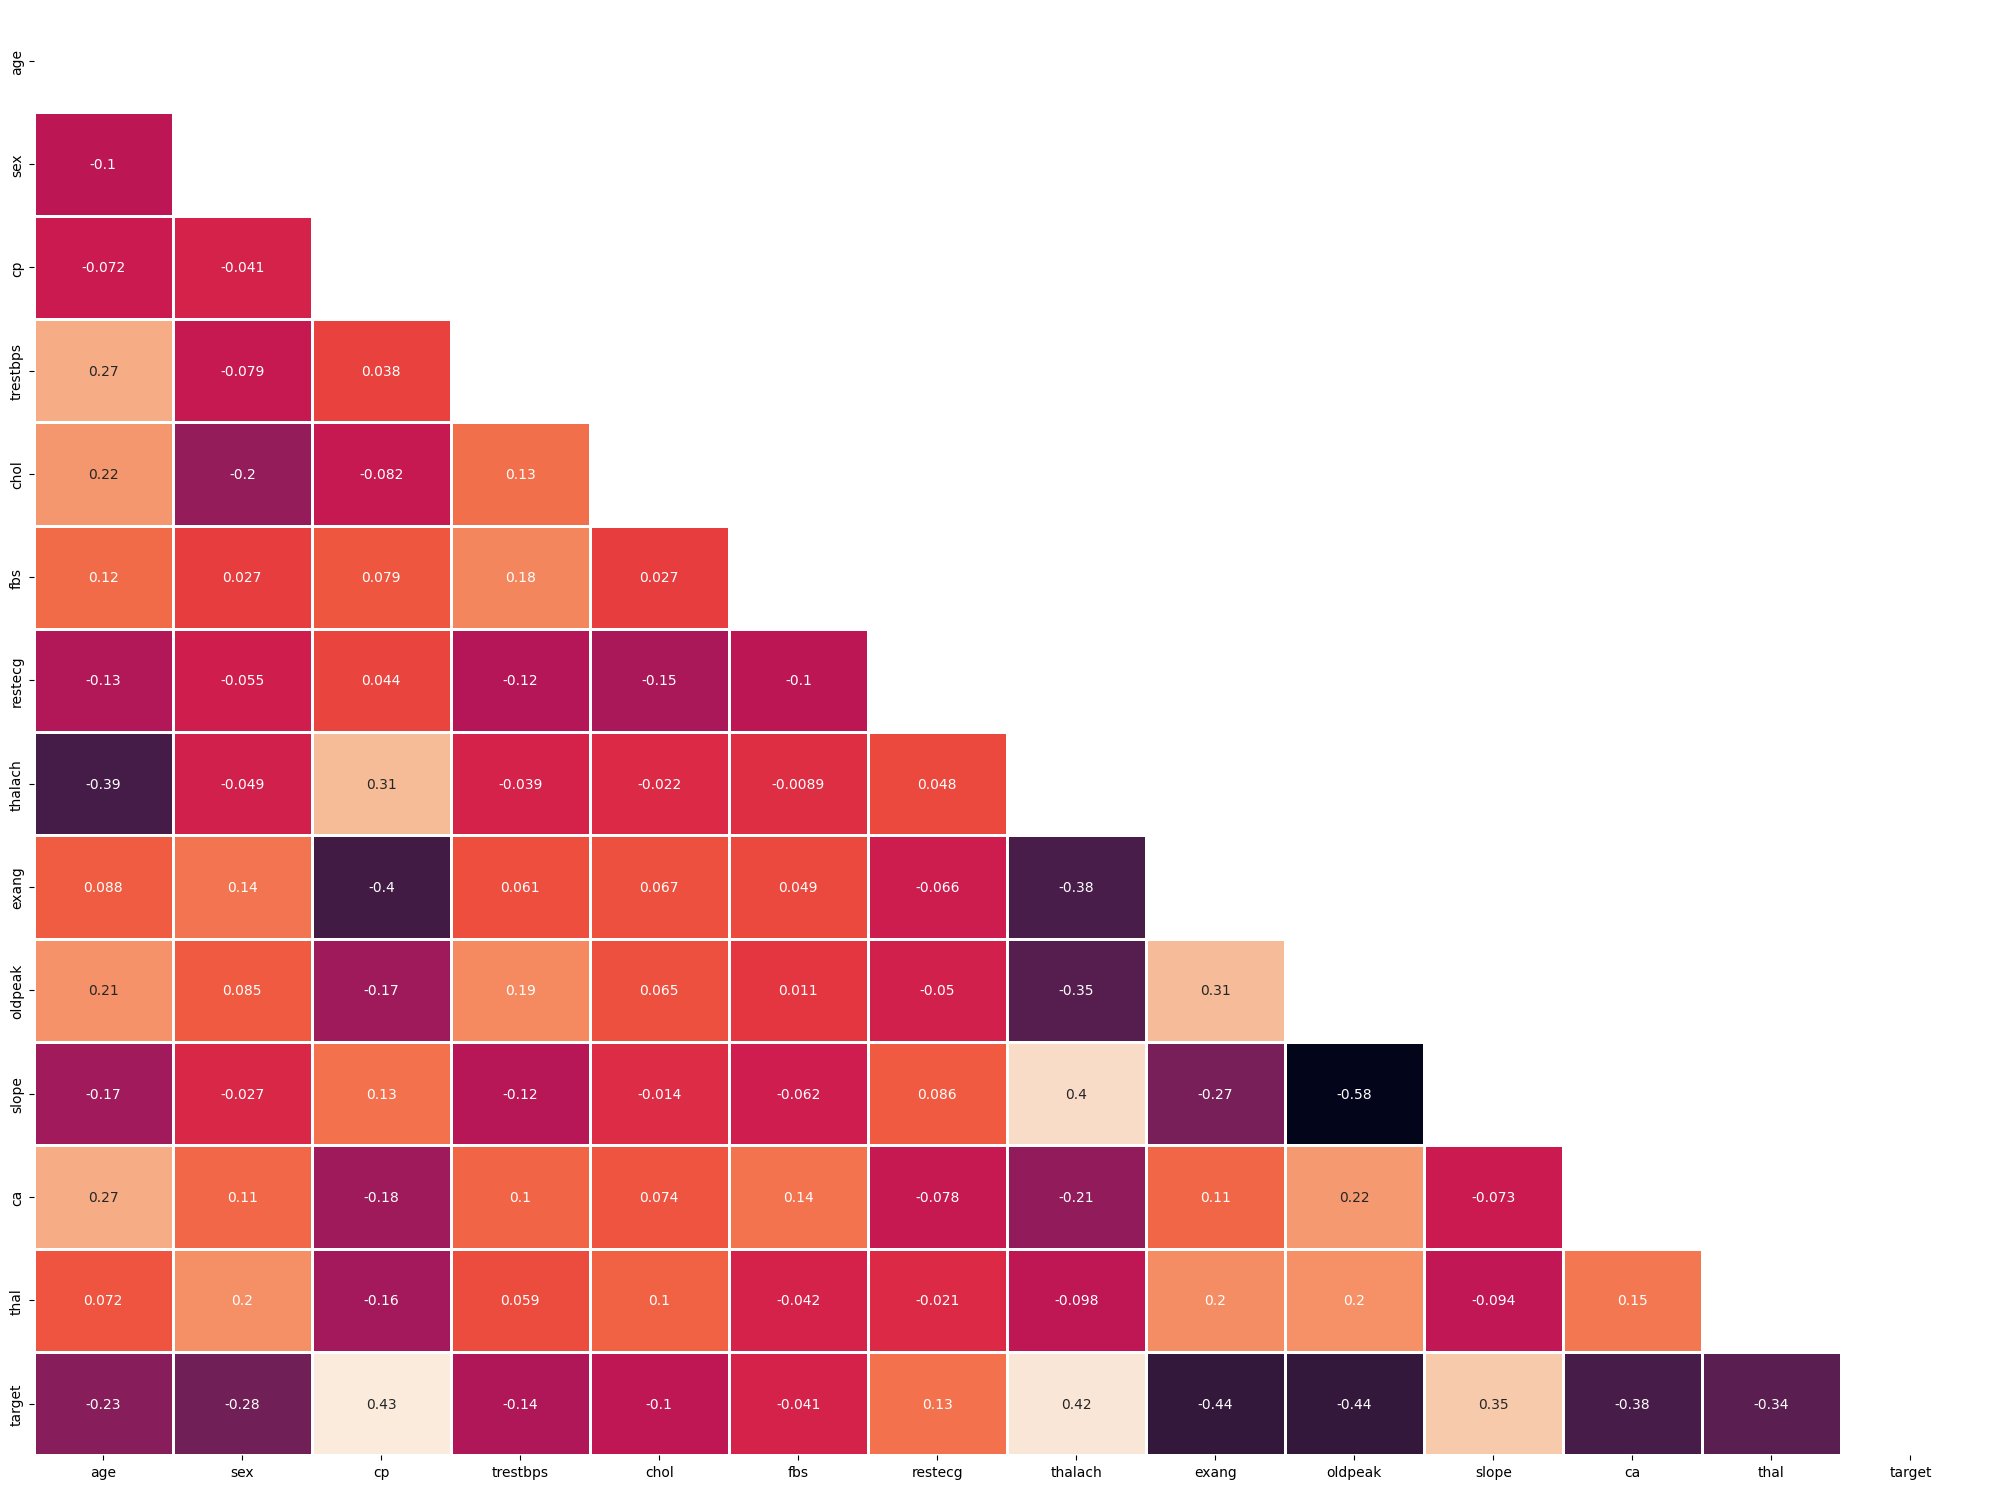

In [9]:
plt.figure(figsize=(20,15))
corr= df_normalized.corr(method = 'pearson')

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix, cbar=False, linewidths=2,)
plt.tight_layout()

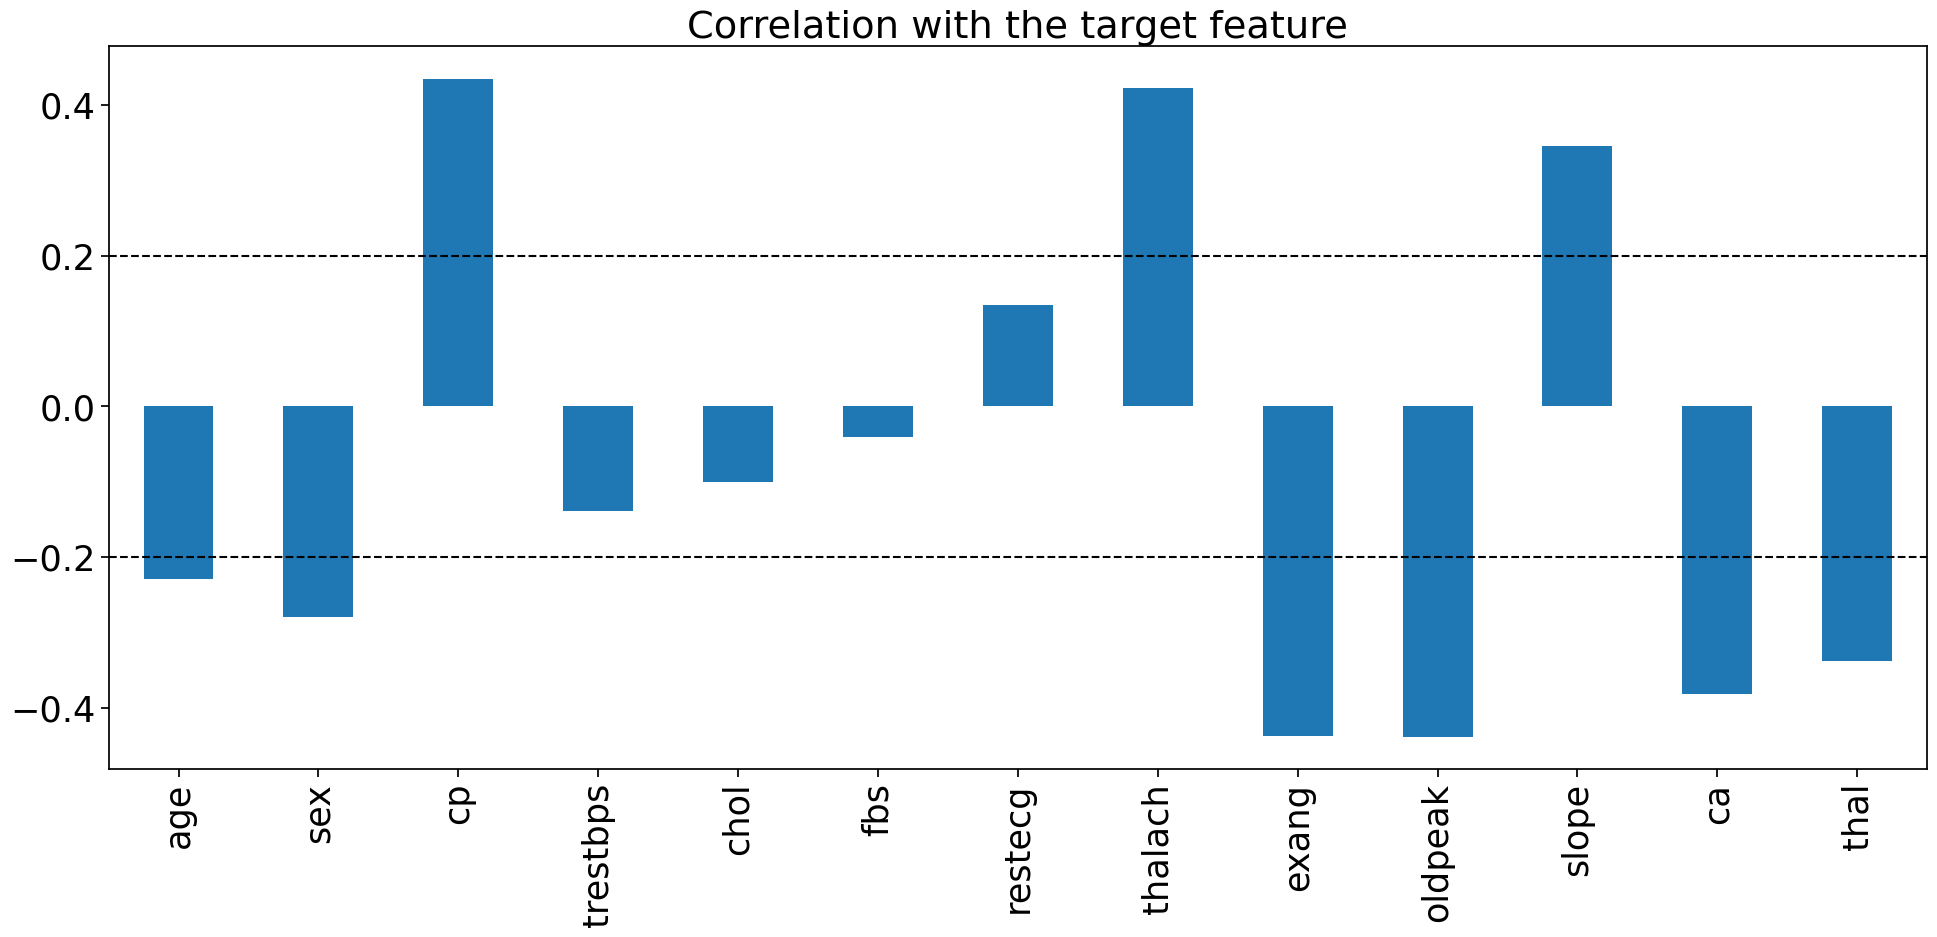

In [10]:
sns.set_context('notebook',font_scale = 2.3)
df_normalized.drop('target', axis=1).corrwith(df_normalized.target).plot(kind='bar', figsize=(20, 10), 
                                                   title="Correlation with the target feature")
plt.axhline(y = 0.2, ls = '--', c = "black")
plt.axhline(y = -0.2, ls = '--', c = "black")
plt.tight_layout()

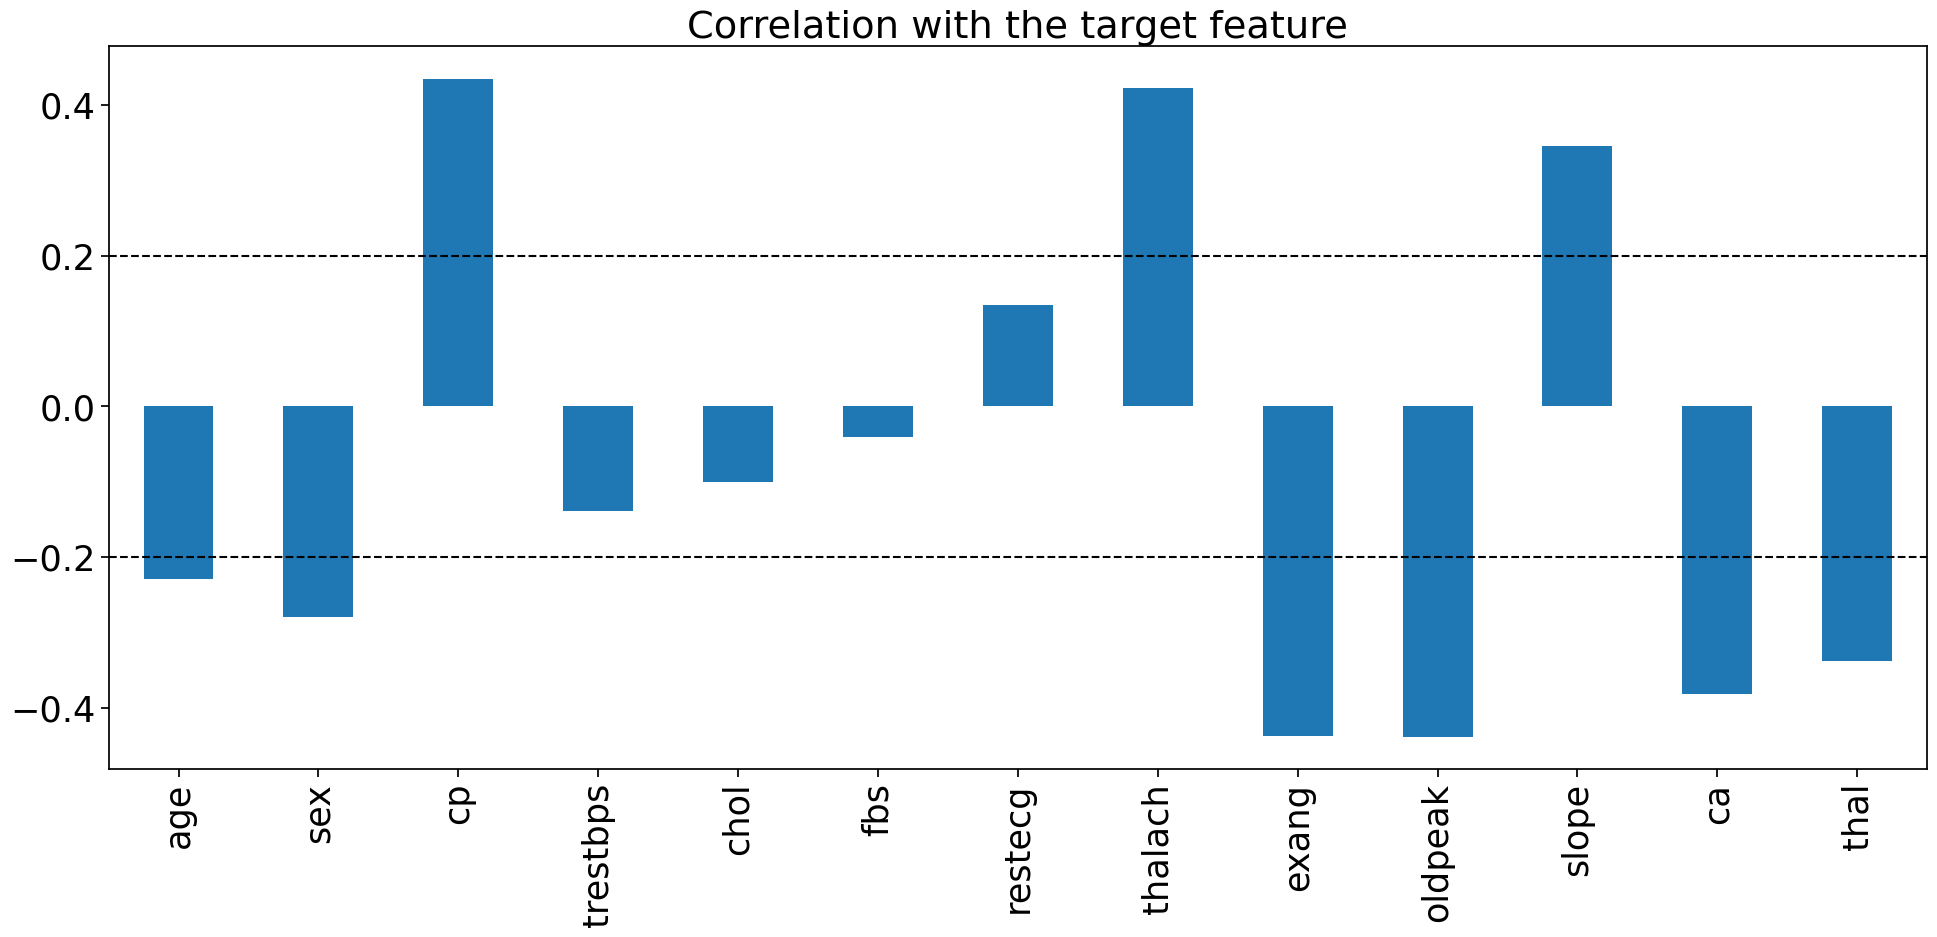

In [11]:
# plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', figsize=(20, 10), 
                                                   title="Correlation with the target feature")
plt.axhline(y = 0.2, ls = '--', c = "black")
plt.axhline(y = -0.2, ls = '--', c = "black")
plt.tight_layout()

**9 parameters are moderately correlated with "having a heart disease"**
- age
- sex
- cp
- thalach
- exang
- oldpeak
- slope 
- ca
- thal

## Exploratory data analysis

##### First overview of the dataset

In [14]:
dp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [134]:
data['sex_name'] = data['sex'].apply(lambda x : 'Male' if x == 1 else 'Female')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_name
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Male
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Male
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Male
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Female


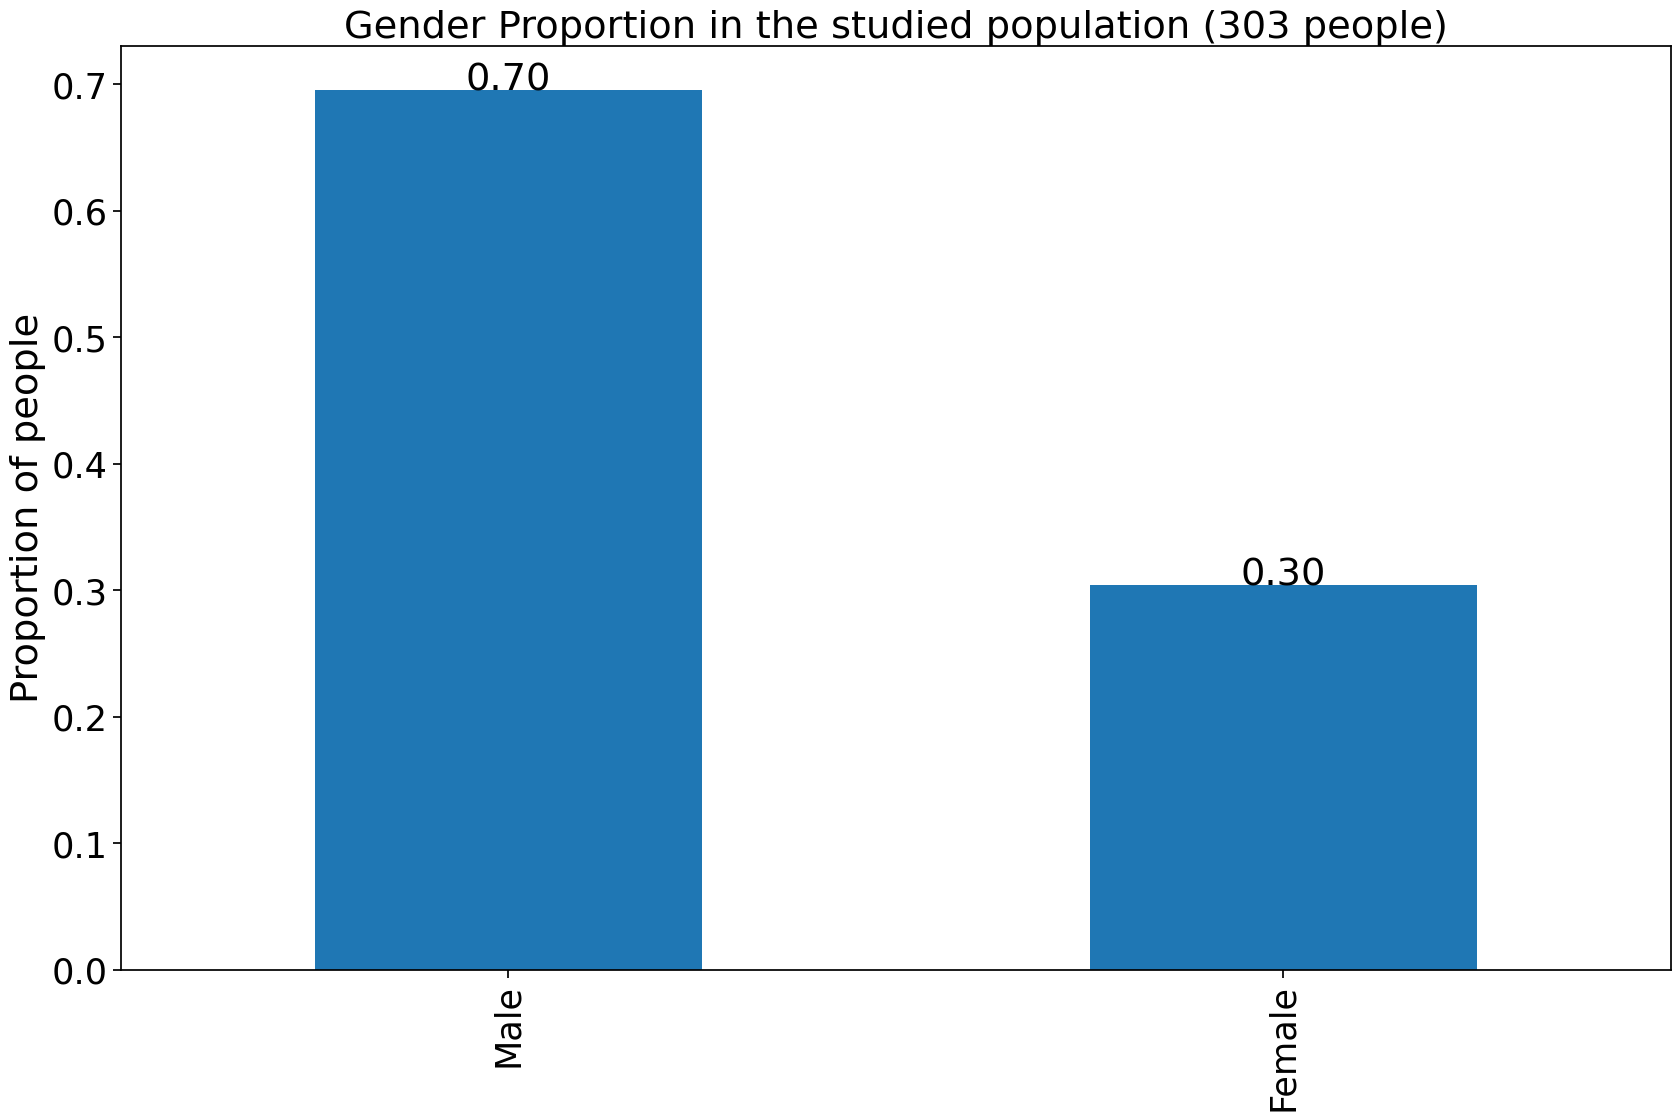

In [135]:
plt.figure(figsize = (20,12))
data['sex_name'].value_counts(1).plot(kind= 'bar', title = "Gender Proportion in the studied population (303 people)", ylabel  = 'Proportion of people')

for i in range(len(data['sex_name'].value_counts(1))):
    plt.text(x = i, y = data['sex_name'].value_counts(1)[i], s = f"{data['sex_name'].value_counts(1)[i]:.2f}", ha='center')

In [136]:
data['sex_name'].value_counts(1)

Male      0.69561
Female    0.30439
Name: sex_name, dtype: float64

<AxesSubplot: >

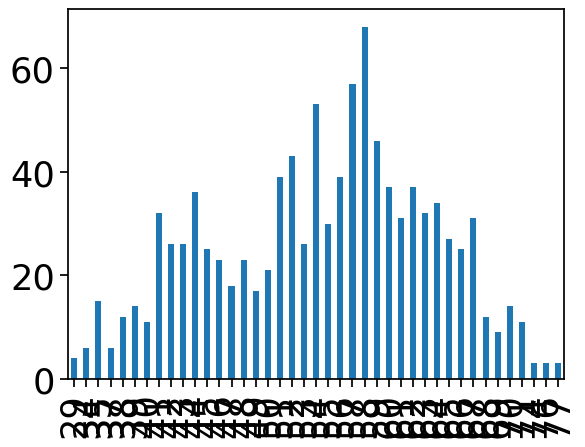

In [137]:
data.age.value_counts().sort_index().plot.bar()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.07229,29.0,48.0,56.0,61.0,77.0


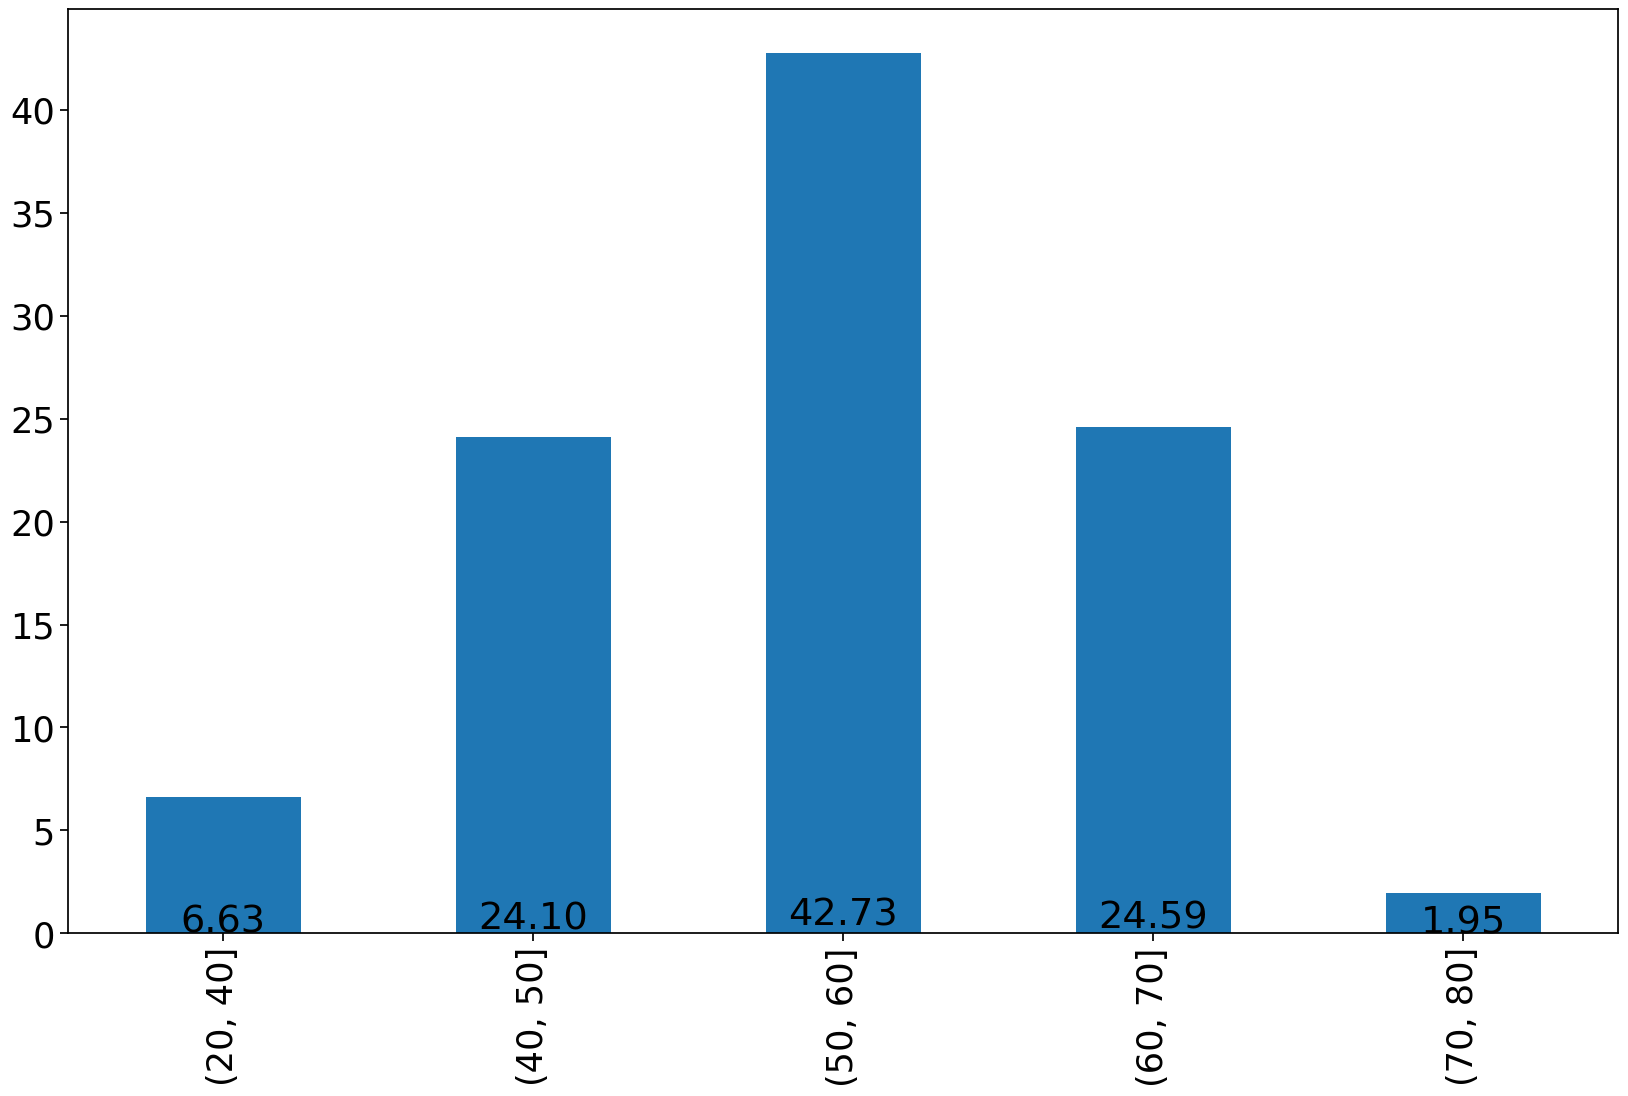

In [138]:
plt.figure(figsize = (20,12))
data['tranche_age'] = pd.cut(x = data['age'],bins = [20,40,50,60,70,80])
((data['tranche_age'].value_counts(1).sort_index())*100).plot.bar()

for i in range(len(data['tranche_age'].value_counts(1))):
    plt.text(x = i, y = data['tranche_age'].value_counts(1).sort_index().values[i], 
    s = f"{data['tranche_age'].value_counts(1).sort_index().values[i]*100:.2f}",
    ha='center')

data['age'].describe().to_frame().T

<AxesSubplot: xlabel='tranche_age'>

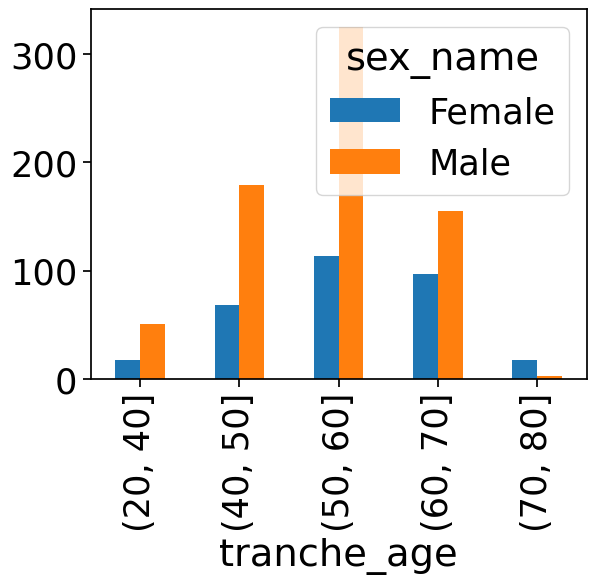

In [139]:
data.groupby('tranche_age')['sex_name'].value_counts().unstack().plot.bar()

In [140]:
data['chol'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
chol,1025.0,246.0,51.59251,126.0,211.0,240.0,275.0,564.0


In [141]:
data['chol_lvl'] = pd.qcut(x= data['chol'], q = 5)

<AxesSubplot: xlabel='chol_lvl'>

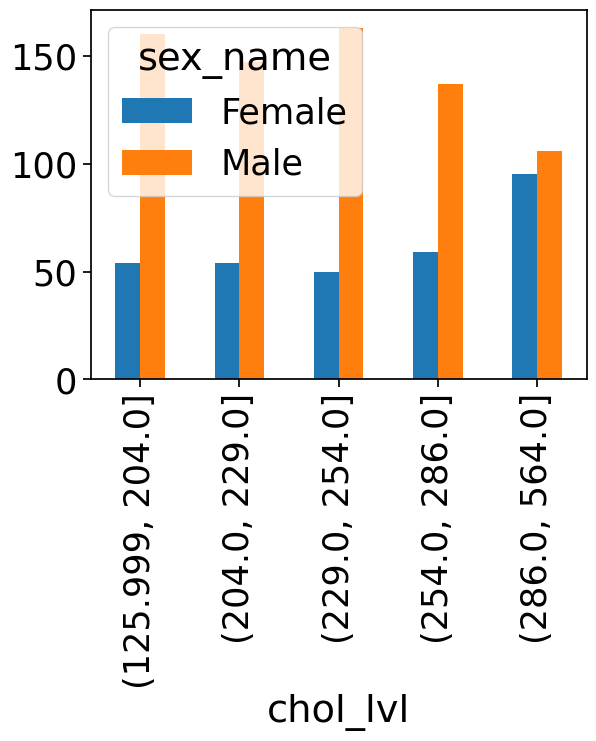

In [142]:
data.groupby('chol_lvl')['sex_name'].value_counts().unstack().plot.bar()

<AxesSubplot: xlabel='chol_lvl'>

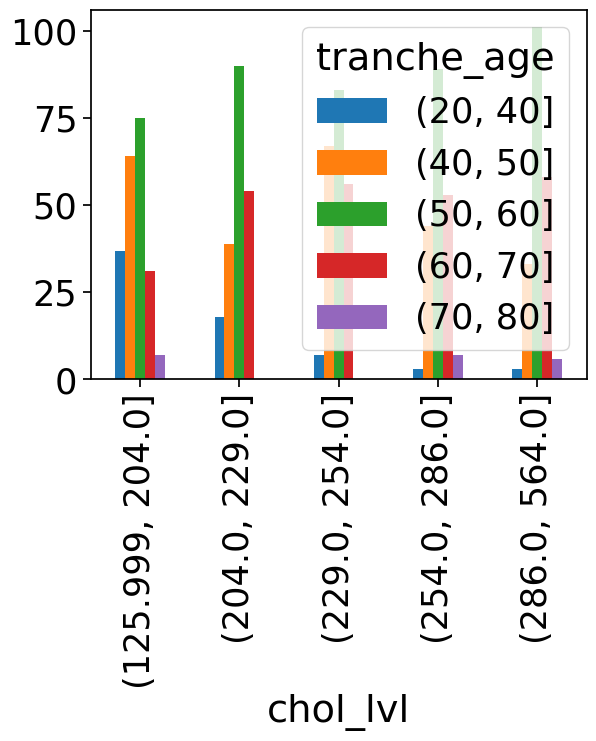

In [143]:
data.groupby('chol_lvl')['tranche_age'].value_counts().unstack().plot.bar()

## **Building model**

In [144]:
data = data.drop(['sex_name', 'tranche_age', 'chol_lvl', 'trestbps','chol','fbs','restecg'], axis=1)

In [145]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

In [146]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 363, 0: 354})

In [147]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Machine Learning models 

3 different machine learning algorithms will be tested to observe their predictions accuracy

- Logistic Regression
- K-Nearest Neighbour
- Random Forest Classifier

#### Logistic Regression

In [148]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("Confusion matrix")
print(lr_conf_matrix)
print("Logistic Regression accuracy : ", round(lr_acc_score*100, 3), '% \n')
print(classification_report(y_test,lr_predict))

Confusion matrix
[[122  23]
 [ 14 149]]
Logistic Regression accuracy :  87.987 % 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       145
           1       0.87      0.91      0.89       163

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308



#### K-nearest Neighbour

In [149]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("Confusion matrix")
print(knn_conf_matrix)
print("K-NeighborsClassifier accuracy : ", round(knn_acc_score*100, 3),'% \n')
print(classification_report(y_test,knn_predicted))

Confusion matrix
[[131  14]
 [ 21 142]]
K-NeighborsClassifier accuracy :  88.636 % 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       145
           1       0.91      0.87      0.89       163

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308



#### Random Forest Classifier

In [150]:
rf = RandomForestClassifier(n_estimators=20, random_state=0,max_depth=6)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confusion matrix")
print(rf_conf_matrix)
print("Random Forest accuracy : ",round(rf_acc_score*100, 3),'% \n')
print(classification_report(y_test,rf_predicted))

confusion matrix
[[135  10]
 [  5 158]]
Random Forest accuracy :  95.13 % 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       145
           1       0.94      0.97      0.95       163

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



# **Conclusion**


This project allows to conclude that Random Forest Classifier algorithm is the algorithm that provides the best accuracy. **(95.13%)**


Also, the symptoms that are the most related to heart diseases are : 
- chest pains
- a high maximum heart rate
- exercice induce angina
- ST depression induced by exercise